# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.6697,  0.0822,  0.8951,  0.0206,  0.8072,  0.5965,  0.5784,  0.1337,  0.4251,  0.7929,
        0.6615,  0.1179,  0.3023,  0.1061,  0.5236,  0.0079,  0.2372,  0.3137,  0.2993,  0.5427,
        0.4578,  0.7135,  0.0206,  0.2686,  0.0258,  0.5808,  0.5759,  0.6707,  0.7968,  0.5507])

In [6]:
y

array([ 10.009 ,   8.2465,  10.6854,   8.0619,  10.4215,   9.7894,   9.7351,   8.401 ,   9.2753,
        10.3786,   9.9846,   8.3538,   8.9069,   8.3182,   9.5709,   8.0237,   8.7116,   8.9412,
         8.8979,   9.6281,   9.3733,  10.1404,   8.0619,   8.8057,   8.0774,   9.7423,   9.7278,
        10.012 ,  10.3903,   9.6521])

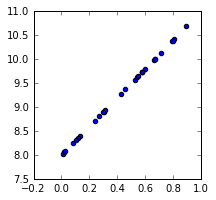

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.7705

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!